# Titanic - Machine Learning from Disaster Report

## Importing Libraries

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Scikit-learn Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier

pd.options.mode.chained_assignment = None  # default='warn'
sns.set(style='whitegrid', palette='Set2', font_scale=1.2)

#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout  
from keras.utils import np_utils

ModuleNotFoundError: No module named 'tensorflow'

In [68]:
conda install -c conda-forge keras

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/radharamyakrishnadommeti/opt/anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py38h50d1736_1         966 KB  conda-forge
    keras-2.10.0               |     pyhd8ed1ab_0         981 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following NEW packages will be INSTALLED:

  keras              conda-forge/noarch::keras-2.10.0-pyhd8ed1ab_0
  python_abi         conda-forge/osx-6

## Data Loading

In [2]:
#import the titanic train dataset
train_data = pd.read_csv('Titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Import the titanic test dataset
test_data = pd.read_csv('Titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Dataset features description

In [4]:
print('Shape of train dataset {}'.format(train_data.shape))
print('Shape of test dataset {}'.format(test_data.shape))

Shape of train dataset (891, 12)
Shape of test dataset (418, 11)


In [5]:
train_data.describe(include='all') # to see even categorical data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Baclini, Miss. Eugenie",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_data[train_data["Name"].str.contains('Jack', na=False)] # There is a Jackson but not Jack

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C


In [7]:
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test_data.isnull().sum()))

print('\nDuplicated values in train {}'.format(train_data.duplicated().sum()))
print('Duplicated values in test {}'.format(test_data.duplicated().sum()))


Null Values in Training 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Values in Testing 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


In [8]:
print('Embarkation per ports \n{}'.format(train_data['Embarked'].value_counts()))

# since the most common port is Southampton the chances are that the missing one is from there
train_data['Embarked'].fillna(value='S', inplace=True)
test_data['Fare'].fillna(value=test_data.Fare.mean(), inplace=True)

print('Embarkation per ports after filling \n{}'.format(train_data['Embarked'].value_counts()))

Embarkation per ports 
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Embarkation per ports after filling 
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [9]:
# takes the dataset tha contains all the Misses 
train_data[train_data["Name"].str.contains('Mrs.', na=False)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


In [10]:
mean_age_miss = train_data[train_data["Name"].str.contains('Miss.', na=False)]['Age'].mean()
mean_age_mrs = train_data[train_data["Name"].str.contains('Mrs.', na=False)]['Age'].mean()
mean_age_mr = train_data[train_data["Name"].str.contains('Mr.', na=False)]['Age'].mean()
mean_age_master = train_data[train_data["Name"].str.contains('Master.', na=False)]['Age'].mean()

print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

Mean age of Miss. title 21.773972602739725
Mean age of Mrs. title 35.642857142857146
Mean age of Mr. title 33.11839530332681
Mean age of Master. title 4.574166666666667


In [11]:
def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

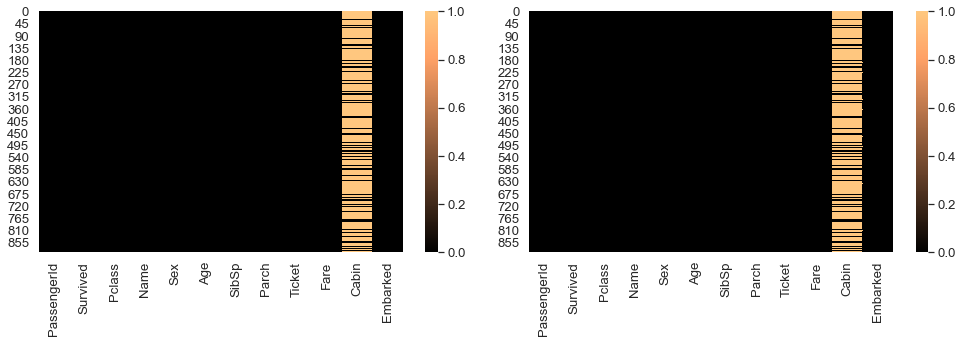

In [12]:
train_data['Age'] = train_data[['Name', 'Age']].apply(fill_age,axis=1)
test_data['Age'] = test_data[['Name', 'Age']].apply(fill_age,axis=1)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(train_data.isnull(),cmap='copper', ax=ax1)
sns.heatmap(train_data.isnull(), cmap='copper', ax=ax2)
plt.tight_layout()

In [13]:
train_data['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in train_data['Cabin']])
test_data['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in test_data['Cabin']])

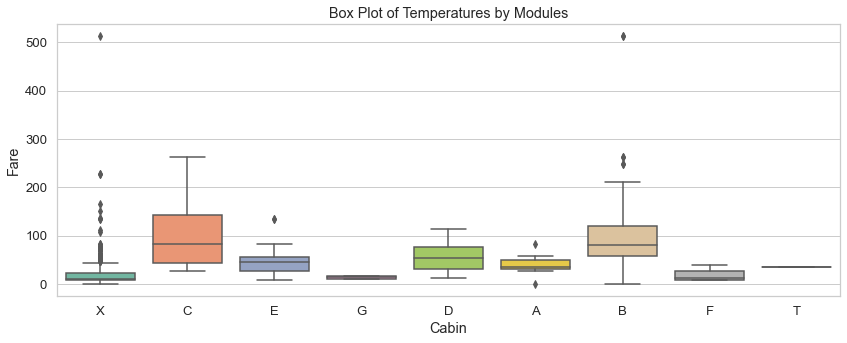

In [14]:
plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=train_data, palette='Set2')
plt.tight_layout()

In [15]:
print('Mean Fare of Cabin B {}'.format(train_data[train_data['Cabin']=='B']['Fare'].mean()))
print('Mean Fare of Cabin C {}'.format(train_data[train_data['Cabin']=='C']['Fare'].mean()))
print('Mean Fare of Cabin D {}'.format(train_data[train_data['Cabin']=='D']['Fare'].mean()))
print('Mean Fare of Cabin E {}'.format(train_data[train_data['Cabin']=='E']['Fare'].mean()))

Mean Fare of Cabin B 113.50576382978724
Mean Fare of Cabin C 100.15134067796612
Mean Fare of Cabin D 57.24457575757576
Mean Fare of Cabin E 46.026693749999986


In [16]:
def reasign_cabin(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin=='X':
        if (fare >= 113.5):
            return 'B'
        if ((fare < 113.5) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 57)):
            return 'D'
        if ((fare < 57) and (fare > 46)):
            return 'D'
        else:
            return 'X'
    else:
        return cabin

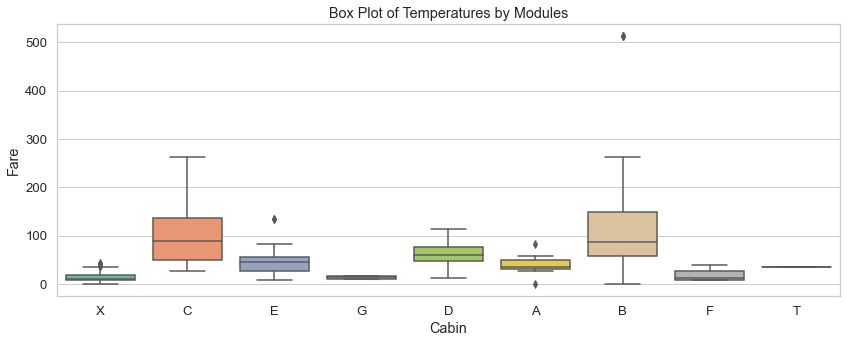

In [17]:
train_data['Cabin'] = train_data[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)
test_data['Cabin'] = test_data[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)

plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=train_data, palette='Set2')
plt.tight_layout()

In [18]:
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))


Null Values in Training 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


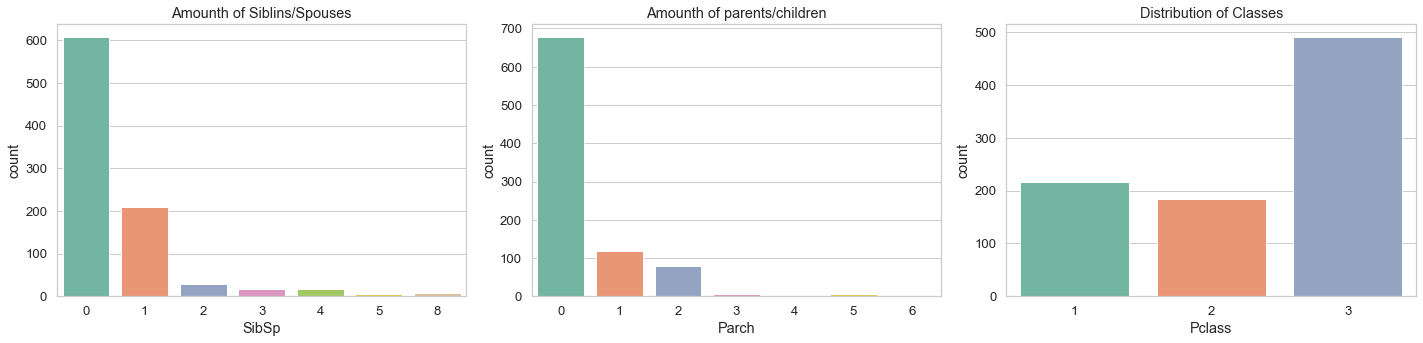

In [19]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Amounth of Siblins/Spouses')
sns.countplot(x='SibSp', data=train_data, ax=axx[0])
axx[1].set_title('Amounth of parents/children')
sns.countplot(x='Parch', data=train_data, ax=axx[1])
axx[2].set_title('Distribution of Classes')
sns.countplot(x='Pclass', data=train_data, ax=axx[2])
plt.tight_layout()

According to the graphs above, most of the people were alone and most belonged to 3rd class. 

In [20]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0

In [21]:
train_data['Alone'] = train_data[['SibSp','Parch']].apply(create_alone_feature, axis=1)
train_data['Familiars'] = 1 + train_data['SibSp'] + train_data['Parch']

test_data['Alone'] = test_data[['SibSp','Parch']].apply(create_alone_feature, axis=1)
test_data['Familiars'] = 1 + test_data['SibSp'] + test_data['Parch']

For classification data is viewed in relation to the label.

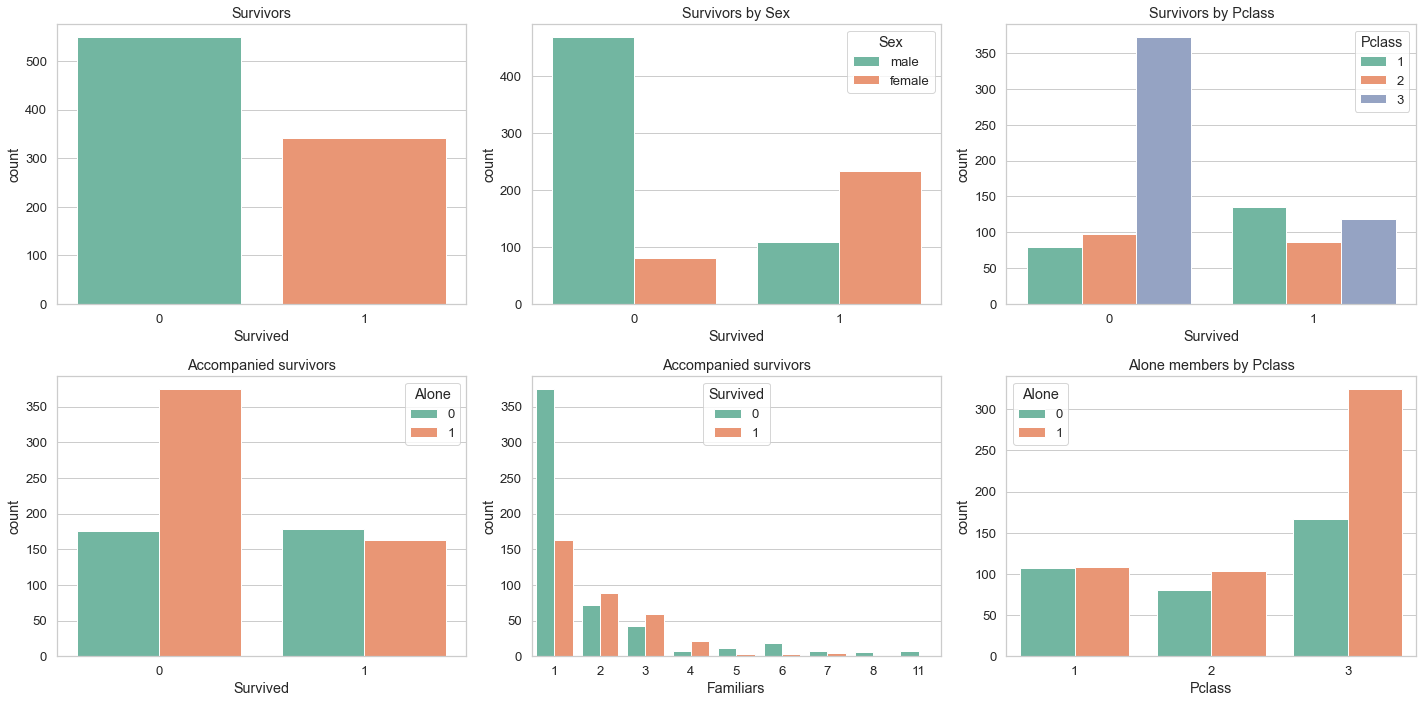

In [22]:
fig, axx = plt.subplots(2, 3, figsize=(20,10))
axx[0,0].set_title('Survivors')
sns.countplot(x='Survived', data=train_data, ax=axx[0,0])
axx[0,1].set_title('Survivors by Sex')
sns.countplot(x='Survived', hue='Sex', data=train_data, ax=axx[0,1])
axx[0,2].set_title('Survivors by Pclass')
sns.countplot(x='Survived', hue='Pclass', data=train_data, ax=axx[0,2])
axx[1,0].set_title('Accompanied survivors')
sns.countplot(x='Survived', hue='Alone', data=train_data, ax=axx[1,0])
axx[1,1].set_title('Accompanied survivors')
sns.countplot(x='Familiars', hue='Survived', data=train_data, ax=axx[1,1])
axx[1,2].set_title('Alone members by Pclass')
sns.countplot(x='Pclass', hue='Alone', data=train_data, ax=axx[1,2])
plt.tight_layout()

From the countplots it is depicted that most people died in the incident. Most of those who died were alone.  

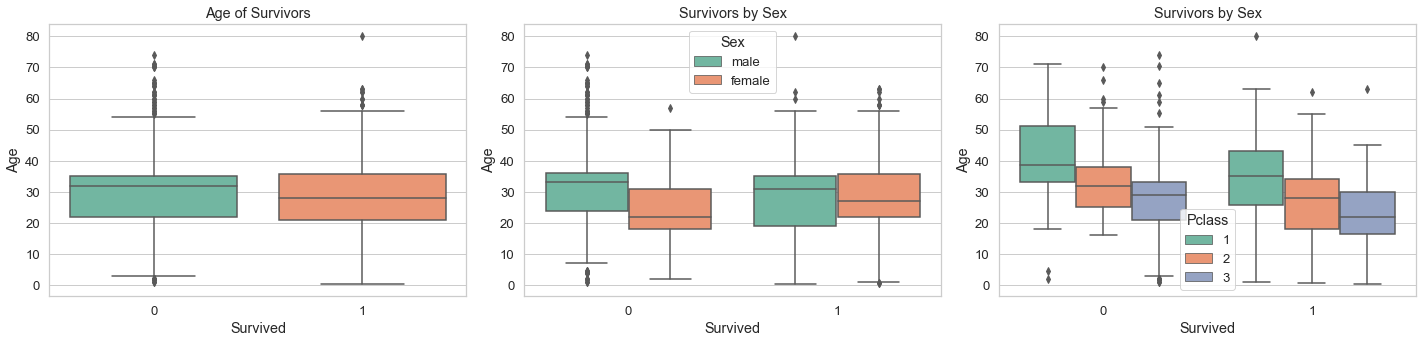

In [23]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Age of Survivors')
sns.boxplot(x='Survived', y='Age', data=train_data, ax=axx[0])
axx[1].set_title('Survivors by Sex')
sns.boxplot(x='Survived', y='Age', hue='Sex', data=train_data, ax=axx[1])
axx[2].set_title('Survivors by Sex')
sns.boxplot(x='Survived', y='Age', hue='Pclass', data=train_data, ax=axx[2])
plt.tight_layout()

/Users/radharamyakrishnadommeti/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/radharamyakrishnadommeti/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


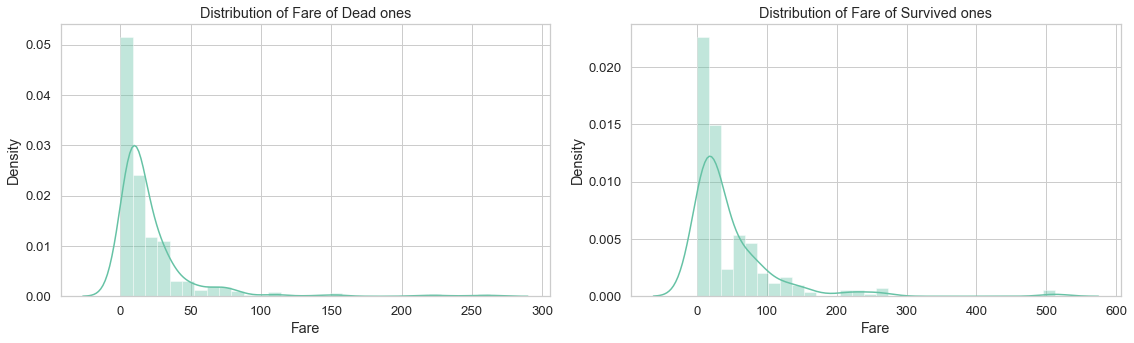

In [24]:
fig, axx = plt.subplots(1, 2, figsize=(16,5))
axx[0].set_title('Distribution of Fare of Dead ones')
sns.distplot(a=train_data[train_data['Survived']==0]['Fare'], ax=axx[0], bins=30)
axx[1].set_title('Distribution of Fare of Survived ones')
sns.distplot(a=train_data[train_data['Survived']==1]['Fare'], ax=axx[1], bins=30)
plt.tight_layout()

# Heatmap
We used heatmap to show the relation between the variables

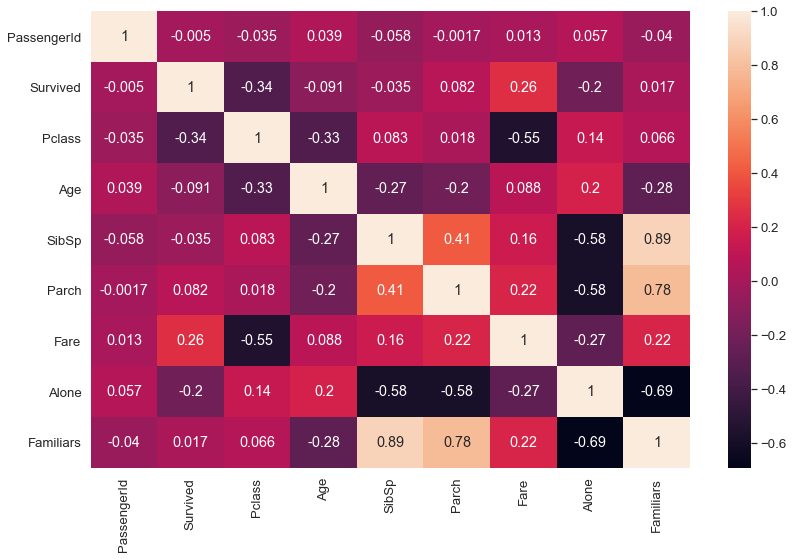

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True)
plt.tight_layout()

### Mapping Categoricals 

Machine Learning algorithms deals with numbers and not categorical. Therefore, 1 defined for female and 0 for males, to have a positive correlation since most of the survivals were females.

In [26]:
categories = {"female": 1, "male": 0}
train_data['Sex']= train_data['Sex'].map(categories)
test_data['Sex']= test_data['Sex'].map(categories)

In [27]:
categories = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked']= train_data['Embarked'].map(categories)
test_data['Embarked']= test_data['Embarked'].map(categories)

categories = train_data.Cabin.unique()
train_data['Cabin'] = train_data.Cabin.astype("category").cat.codes
test_data['Cabin'] = test_data.Cabin.astype("category").cat.codes

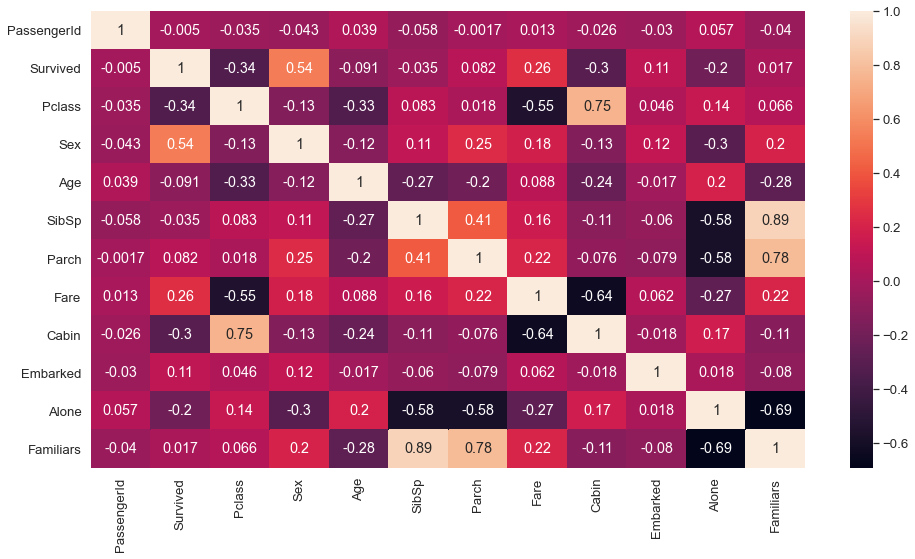

In [28]:
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot=True)
plt.tight_layout()

Drop the non importance features like the name and ticket number.

In [29]:
# dropping columns
train_data = train_data.drop(['Name','Ticket','PassengerId'], axis=1)
test_data = test_data.drop(['Name','Ticket','PassengerId'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars
0,0,3,0,22.0,1,0,7.2500,8,1,0,2
1,1,1,1,38.0,1,0,71.2833,2,2,0,2
2,1,3,1,26.0,0,0,7.9250,8,1,1,1
3,1,1,1,35.0,1,0,53.1000,2,1,0,2
4,0,3,0,35.0,0,0,8.0500,8,1,1,1


In [30]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars
0,3,0,34.5,0,0,7.8292,7,3,1,1
1,3,1,47.0,1,0,7.0000,7,1,0,2
2,2,0,62.0,0,0,9.6875,7,3,1,1
3,3,0,27.0,0,0,8.6625,7,1,1,1
4,3,1,22.0,1,1,12.2875,7,1,0,3


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
# Dropping label
LABEL = 'Survived'
y = train_data[LABEL]
train_data = train_data.drop(LABEL, axis=1)  # Dropping label to normalize

In [33]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

scaled_train = pd.DataFrame(scaled_train, columns=train_data.columns, index=train_data.index)
scaled_test = pd.DataFrame(scaled_test, columns=test_data.columns, index=test_data.index)

In [34]:
scaled_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars
0,1.0,0.0,0.271174,0.125,0.0,0.014151,1.00,0.0,0.0,0.1
1,0.0,1.0,0.472229,0.125,0.0,0.139136,0.25,0.5,0.0,0.1
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.00,0.0,1.0,0.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.25,0.0,0.0,0.1
4,1.0,0.0,0.434531,0.000,0.0,0.015713,1.00,0.0,1.0,0.0


## Classification

Use Random Forest Classifier. Random forests is a supervised learning algorithm. split the data to use a testing set with labels.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

In [36]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(712, 10) (179, 10)
(712,) (179,)


# LOGISTIC REGRESSION

We find the accuracy using logistic regression model for the given dataset

In [37]:
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)
print ("Accuracy Score: {}".format(round(accuracy_score(y_pred, y_test),4)))

Accuracy Score: 0.7989


# Random Forest Classifier

In [38]:
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# Extract single tree
estimator = clf.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot'

# Assessing Feature Importance

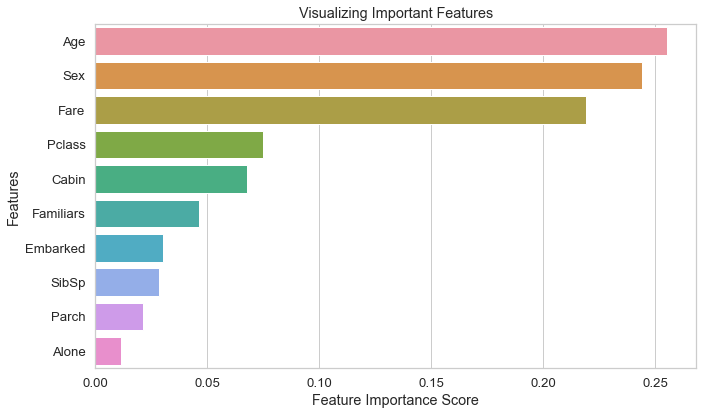

In [40]:
feature_imp = pd.Series(clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [41]:
y_pred = clf.predict(X_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.8435754189944135


In [42]:
# Removing less important features
new_train = scaled_train.drop(['Alone','Parch','Embarked'], axis=1)
new_test = scaled_test.drop(['Alone','Parch','Embarked'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))



   Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       113
           1       0.74      0.76      0.75        66

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Confusion Matrix

We used for evaluating the performance of a classification model

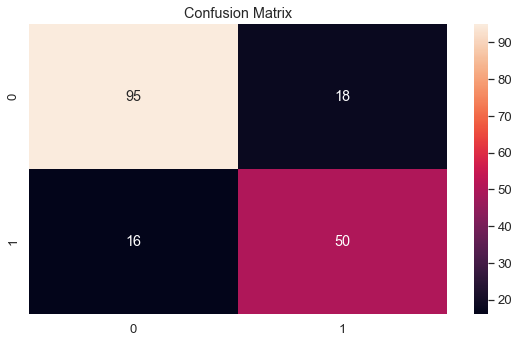

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [44]:
prediction = clf.predict(new_test)

test_data['Survival_Predictions'] = pd.Series(prediction)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars,Survival_Predictions
0,3,0,34.5,0,0,7.8292,7,3,1,1,0
1,3,1,47.0,1,0,7.0000,7,1,0,2,0
2,2,0,62.0,0,0,9.6875,7,3,1,1,0
3,3,0,27.0,0,0,8.6625,7,1,1,1,1
4,3,1,22.0,1,1,12.2875,7,1,0,3,0


# KNN Analysis

We used KNN Analysis to solve both classification and regression problems

In [45]:
# KNN applied to train data
clf =  KNeighborsClassifier()
clf.fit(X_train,y_train)
predictions_clf = clf.predict(X_test)

In [46]:
# Print Accuracy Score for knn
print("Accuracy Score is:")
print("Accuracy: {}".format(metrics.accuracy_score(y_test, predictions_clf)*100, 2))
print()

Accuracy Score is:
Accuracy: 79.3296089385475



In [47]:
# Classification Report of Prediction
print("Classification Report:")
print(classification_report(y_test, predictions_clf))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       113
           1       0.75      0.67      0.70        66

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [48]:
# Confusion Matrix for predictions made
conf2 = confusion_matrix(y_test,predictions_clf)
conf2

array([[98, 15],
       [22, 44]])

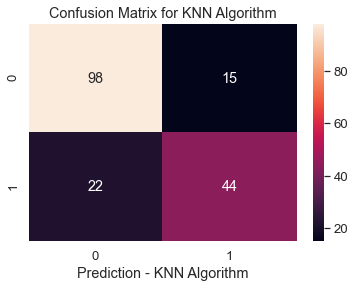

In [49]:
# Plot Confusion Matrix for Linear Discrimination Analysis
label = ["0","1"]
sns.heatmap(conf2, annot=True, xticklabels=label, yticklabels=label)
plt.xlabel("Prediction - KNN Algorithm")
plt.title("Confusion Matrix for KNN Algorithm")
plt.show()

# Decision Tree Model Analysis

In [50]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [51]:
X_train.head()

,Pclass,Sex,Age,SibSp,Fare,Cabin,Familiars
123,0.5,1.0,0.403116,0.000,0.025374,0.5,0.0
360,1.0,0.0,0.497361,0.125,0.054457,1.0,0.5
267,1.0,0.0,0.308872,0.125,0.015176,1.0,0.1
558,0.0,1.0,0.484795,0.125,0.155466,0.5,0.2
821,1.0,0.0,0.334004,0.000,0.016908,1.0,0.0


In [52]:
import graphviz
from graphviz import Source
import pydot
graph = Source( tree.export_graphviz(model, out_file=None,filled=True, 
                                rounded=True,  
                                special_characters=True, feature_names=X_train.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

ModuleNotFoundError: No module named 'graphviz'

In [53]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_1 <= 0.50
|   |--- feature_5 <= 0.75
|   |   |--- feature_2 <= 0.09
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.09
|   |   |   |--- feature_4 <= 0.02
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  0.02
|   |   |   |   |--- feature_3 <= 0.19
|   |   |   |   |   |--- feature_2 <= 0.54
|   |   |   |   |   |   |--- feature_5 <= 0.44
|   |   |   |   |   |   |   |--- feature_0 <= 0.75
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.15
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.08
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_4 >  0.08
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.11
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   

[Text(179.16009521484375, 211.4, 'X[1] <= 0.5\ngini = 0.475\nsamples = 712\nvalue = [436, 276]'),
 Text(87.01040039062501, 199.32, 'X[5] <= 0.75\ngini = 0.298\nsamples = 455\nvalue = [372, 83]'),
 Text(47.16298828125, 187.24, 'X[2] <= 0.089\ngini = 0.484\nsamples = 100\nvalue = [59, 41]'),
 Text(44.54736328125, 175.16, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(49.77861328125, 175.16, 'X[4] <= 0.02\ngini = 0.474\nsamples = 96\nvalue = [59, 37]'),
 Text(47.16298828125, 163.07999999999998, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(52.394238281250004, 163.07999999999998, 'X[3] <= 0.188\ngini = 0.486\nsamples = 89\nvalue = [52, 37]'),
 Text(44.629101562500004, 151.0, 'X[2] <= 0.541\ngini = 0.496\nsamples = 79\nvalue = [43, 36]'),
 Text(36.945703125, 138.92000000000002, 'X[5] <= 0.438\ngini = 0.497\nsamples = 52\nvalue = [24, 28]'),
 Text(34.330078125, 126.84, 'X[0] <= 0.75\ngini = 0.499\nsamples = 46\nvalue = [24, 22]'),
 Text(26.810156250000002, 114.75999999999999, 'X[6] <=

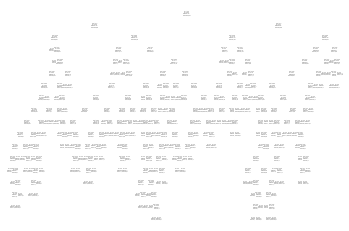

In [54]:
from sklearn import tree
tree.plot_tree(model)

In [55]:
y_pred_train = model.predict(X_train)  

In [56]:
y_pred_test = model.predict(X_test)# make predictions on the testing set

In [57]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test)*100, 2)

Accuracy score for test data is: 77.09497206703911 2


In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  85                  28
Actual Survived              13                  53


# ANN Model Analysis

In [59]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

NameError: name 'np_utils' is not defined

In [ ]:
model=Sequential()
model.add(Dense(1000,input_dim=7,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

In [ ]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy)

### Hyperparamter Tuning (Decision Tree)

In [60]:
import random
def define_seed(val):
    random.seed(val)
    np.random.seed(val)
    os.environ["PYTHONHASHSEED"] = str(val)
my_val = 42
SEED=42
define_seed(my_val)

In [61]:
from sklearn.grid_search import GridSearchCV

parameters = {"max_depth": [3, 5, 7, 9, 11, 13],}
model_desicion_tree = DecisionTreeClassifier(
    random_state=SEED,
    class_weight='balanced',
)
model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)
model_desicion_tree.fit(X_train, y_train)
print(f'{model_desicion_tree.best_params_}')
print(f'Mean cross-validated accuracy score of the best_estimator: ' + f'{model_desicion_tree.best_score_:.3f}')

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [62]:
X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)

### SVM MODEL

In [63]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### MODEL EVALUATION

In [64]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7932960893854749
